In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_excel('Final Dataset.xlsx', index_col=0)

In [3]:
data = data.iloc[1:,:]

In [4]:
# separate exogenous variables for all companies from the prices volumes and tradig ranges

exogenous = data[['Close_1YBond', 'Close_10YBond', 'Unemployment rate', 'Money supply (M2)', 
    'Reference rate', 'CPI',
    'GDP per capita USD', 'Close_EUR/PLN', 'Close_Gold', 'Close_Oil',
    'Close_USD/PLN', 'Close_VIX']]

stocks = data.loc[:, :'Trading range_sWIG80']

pko = pd.DataFrame(stocks['Close_PKO'])
pko_exo = pd.concat((stocks[['Volume_PKO', 'Trading range_PKO']],exogenous), axis=1)

In [5]:
# separate exogenous variables for all companies from the prices volumes and tradig ranges

exogenous = data[['Close_10YBond',
    'Reference rate',
    'Close_EUR/PLN', 'Close_Oil',
    'Close_VIX']]

stocks = data.loc[:, :'Trading range_sWIG80']

pko = pd.DataFrame(stocks['Close_PKO'])
pko_exo = pd.concat((stocks[['Trading range_PKO']],exogenous), axis=1)

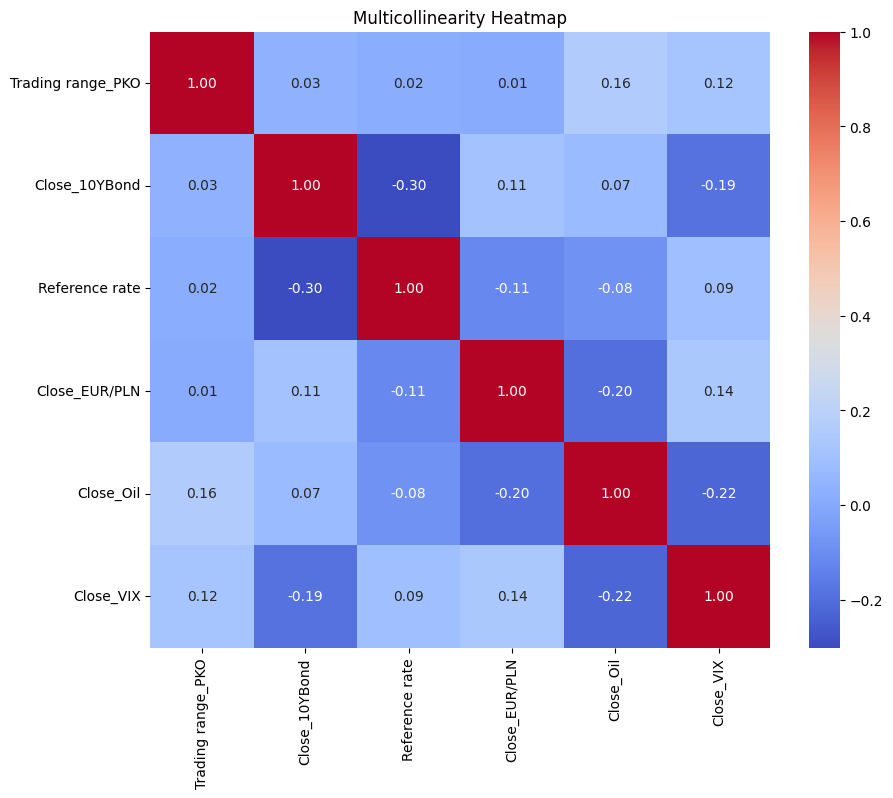

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Load your dataframe
# df = pd.read_csv('your_data.csv')

# Compute the correlation matrix
correlation_matrix = pko_exo.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Set the title
plt.title('Multicollinearity Heatmap')
plt.show()

In [7]:
# Check stationarity of the data

for i in pko_exo.columns:
    result = adfuller(pko_exo[i])

    # If p-value > 0.05, data is non-stationary and needs differencing
    if result[1] > 0.05:
        print("Data is non-stationary. Differencing is required.")
    else:
        print("Data is stationary.")

Data is stationary.
Data is non-stationary. Differencing is required.
Data is stationary.
Data is stationary.
Data is non-stationary. Differencing is required.
Data is stationary.


In [8]:
# if data non stationary apply differencing

for i in pko_exo.columns:
    if adfuller(pko_exo[i].dropna())[1] > 0.05:
        pko_exo[i] = pko_exo[i].diff().dropna()

In [9]:
# Get rid of first row bcs it has nan values after the differencing

pko_exo = pko_exo.iloc[1:,:]


In [10]:
# Check stationarity of the data after differencing

for i in pko_exo.columns:
    result = adfuller(pko_exo[i])

    # If p-value > 0.05, data is non-stationary and needs differencing
    if result[1] > 0.05:
        print("Data is non-stationary. Differencing is required.")
    else:
        print("Data is stationary.")

Data is stationary.
Data is stationary.
Data is stationary.
Data is stationary.
Data is stationary.
Data is stationary.


In [11]:
pko

,Close_PKO
2015-01-02,35.730000
2015-01-05,35.070000
2015-01-06,35.070000
2015-01-07,35.200001
2015-01-08,36.580002
...,...
2019-12-24,34.669998
2019-12-25,34.669998
2019-12-26,34.669998
2019-12-27,34.540001


In [12]:
result = adfuller(pko['Close_PKO'])

# If p-value > 0.05, data is non-stationary and needs differencing
if result[1] > 0.05:
    print("Data is non-stationary. Differencing is required.")
else:
    print("Data is stationary.")

Data is non-stationary. Differencing is required.


In [13]:
pko['Close_PKO'] = pko['Close_PKO'].diff().dropna()

In [14]:
pko = pko.iloc[1:]

In [15]:
result = adfuller(pko['Close_PKO'])

# If p-value > 0.05, data is non-stationary and needs differencing
if result[1] > 0.05:
    print("Data is non-stationary. Differencing is required.")
else:
    print("Data is stationary.")

Data is stationary.


In [16]:
# Normalize the data

scaler = StandardScaler()

pko_exo_scaled = pd.DataFrame(scaler.fit_transform(pko_exo))
pko_exo_scaled.columns = pko_exo.columns
pko_exo_scaled.index = pko_exo.index

In [17]:
pko_exo_scaled

,Trading range_PKO,Close_10YBond,Reference rate,Close_EUR/PLN,Close_Oil,Close_VIX
2015-01-05,-0.184579,-1.833331,5.376521,0.297285,-2.289616,1.102558
2015-01-06,-2.021895,0.005771,5.376521,0.261514,-1.824282,1.380392
2015-01-07,-0.159405,-1.220297,5.376521,0.550044,0.614425,0.961326
2015-01-08,0.721497,-0.147487,5.376521,0.276779,0.114618,0.428811
2015-01-09,-0.184579,0.509335,5.376521,0.128938,-0.376570,0.553836
...,...,...,...,...,...,...
2019-12-24,-2.021895,0.005771,-0.185994,0.040711,0.502399,-0.576020
2019-12-25,-2.021895,0.005771,-0.185994,0.089597,-0.006024,-0.576020
2019-12-26,-2.021895,0.005771,-0.185994,-0.133355,0.485164,-0.580651
2019-12-27,-0.662781,-0.125593,-0.185994,-0.140746,0.028446,-0.400059


In [18]:
pko_exo_scaled_shifted = pko_exo_scaled.shift(1).dropna()
pko = pko.iloc[1:]

In [19]:
X_train = pko_exo_scaled_shifted[pko_exo_scaled_shifted.index < "2019-01-01"].values
X_test = pko_exo_scaled_shifted[pko_exo_scaled_shifted.index >= "2019-01-01"].values
y_train =  pko[pko.index < "2019-01-01"].values
y_test = pko[pko.index >= "2019-01-01"].values
train_index = pko_exo_scaled_shifted[pko_exo_scaled_shifted.index < "2019-01-01"].index
test_index = pko_exo_scaled_shifted[pko_exo_scaled_shifted.index >= "2019-01-01"].index

In [20]:
pko

,Close_PKO
2015-01-06,0.000000
2015-01-07,0.130001
2015-01-08,1.380001
2015-01-09,-0.430000
2015-01-12,0.029999
...,...
2019-12-24,0.000000
2019-12-25,0.000000
2019-12-26,0.000000
2019-12-27,-0.129997


In [21]:
pko_exo_scaled_shifted

,Trading range_PKO,Close_10YBond,Reference rate,Close_EUR/PLN,Close_Oil,Close_VIX
2015-01-06,-0.184579,-1.833331,5.376521,0.297285,-2.289616,1.102558
2015-01-07,-2.021895,0.005771,5.376521,0.261514,-1.824282,1.380392
2015-01-08,-0.159405,-1.220297,5.376521,0.550044,0.614425,0.961326
2015-01-09,0.721497,-0.147487,5.376521,0.276779,0.114618,0.428811
2015-01-12,-0.184579,0.509335,5.376521,0.128938,-0.376570,0.553836
...,...,...,...,...,...,...
2019-12-24,-0.788632,1.363204,-0.185994,-0.167335,0.062916,-0.589912
2019-12-25,-2.021895,0.005771,-0.185994,0.040711,0.502399,-0.576020
2019-12-26,-2.021895,0.005771,-0.185994,0.089597,-0.006024,-0.576020
2019-12-27,-2.021895,0.005771,-0.185994,-0.133355,0.485164,-0.580651


In [22]:
len(train_index), len(test_index)

(1025, 260)

In [23]:
len(y_train)

1025

In [24]:
len(X_train)

1025

In [25]:
len(X_test)

260

In [26]:
len(y_test)

260

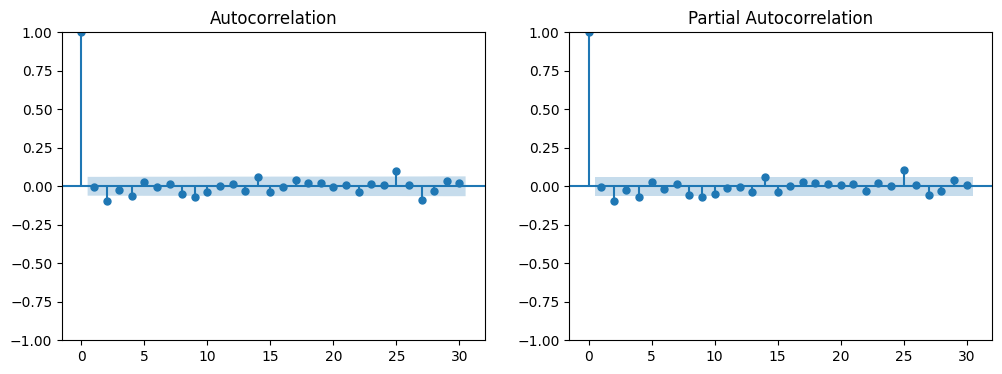

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sm.graphics.tsa.plot_acf(y_train, lags=30, ax=axes[0])
sm.graphics.tsa.plot_pacf(y_train, lags=30, ax=axes[1])
plt.show()

In [28]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Define a function to test different p and q
def test_arima_orders(y, X, max_p=5, max_q=5):
    results = []
    
    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                # Fit ARIMAX model
                model = ARIMA(y, exog=X, order=(p, 1, q))  # Assuming d=1
                fit = model.fit()
                
                # Ljung-Box Test
                lb_test = acorr_ljungbox(fit.resid, lags=[10], return_df=True)
                p_value = lb_test['lb_pvalue'].values[0]  # Get p-value for lag 10
                
                # Store results
                results.append((p, q, fit.aic, p_value))
            except:
                continue
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results, columns=['p', 'q', 'AIC', 'Ljung-Box p-value'])
    return results_df.sort_values(by='AIC')

# Run the test for p and q values up to 5
results = test_arima_orders(y_train, X_train, max_p=5, max_q=5)
print(results)

c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

    p  q          AIC  Ljung-Box p-value
17  2  5  1830.653829       9.315877e-02
5   0  5  1831.730139       1.804068e-01
33  5  3  1832.508954       1.503327e-01
25  4  1  1832.803747       1.311816e-01
3   0  3  1832.927382       4.855052e-02
10  1  4  1833.362987       7.708702e-02
32  5  2  1833.566952       1.756629e-01
11  1  5  1834.319943       1.009848e-01
31  5  1  1834.326649       1.522475e-01
4   0  4  1834.434834       5.345784e-02
9   1  3  1834.518388       4.597688e-02
13  2  1  1834.556575       3.690581e-02
20  3  2  1834.750807       6.374338e-02
26  4  2  1835.384749       9.243004e-02
27  4  3  1835.452936       8.890325e-02
19  3  1  1835.766564       4.483130e-02
16  2  4  1836.249082       2.300802e-02
15  2  3  1836.539672       2.793198e-02
21  3  3  1836.646023       2.364794e-02
14  2  2  1837.549584       3.449767e-02
8   1  2  1839.030243       1.361364e-02
1   0  1  1840.258250       4.246843e-03
34  5  4  1840.635093       8.543817e-02
28  4  4  1840.7

c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMAX model with selected p and q
model_selected = ARIMA(y_train, exog=X_train, order=(2, 1, 5))  # ARIMA with exogenous variables
fit_selected = model_selected.fit()

# Print the summary to check model details
print(fit_selected.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1025
Model:                 ARIMA(2, 1, 5)   Log Likelihood                -901.327
Date:                Tue, 21 Jan 2025   AIC                           1830.654
Time:                        16:47:42   BIC                           1899.694
Sample:                             0   HQIC                          1856.864
                               - 1025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0138      0.017     -0.813      0.416      -0.047       0.019
x2            -0.0302      0.020     -1.503      0.133      -0.070       0.009
x3            -0.0008      0.018     -0.044      0.9

c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


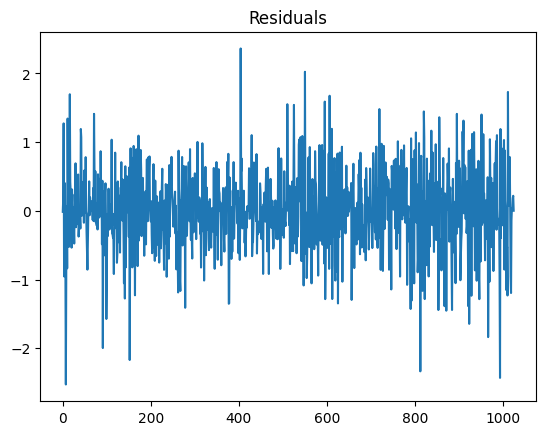

In [30]:
import matplotlib.pyplot as plt

# Get residuals
residuals = fit_selected.resid

# Plot residuals
plt.plot(residuals)
plt.title('Residuals')
plt.show()


# looking for white noise, no pattern

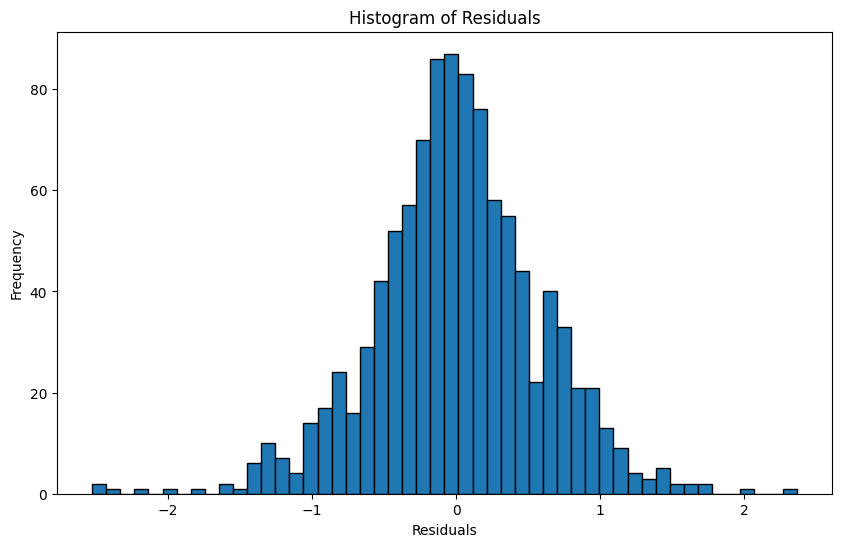

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


# looking for normal distribution

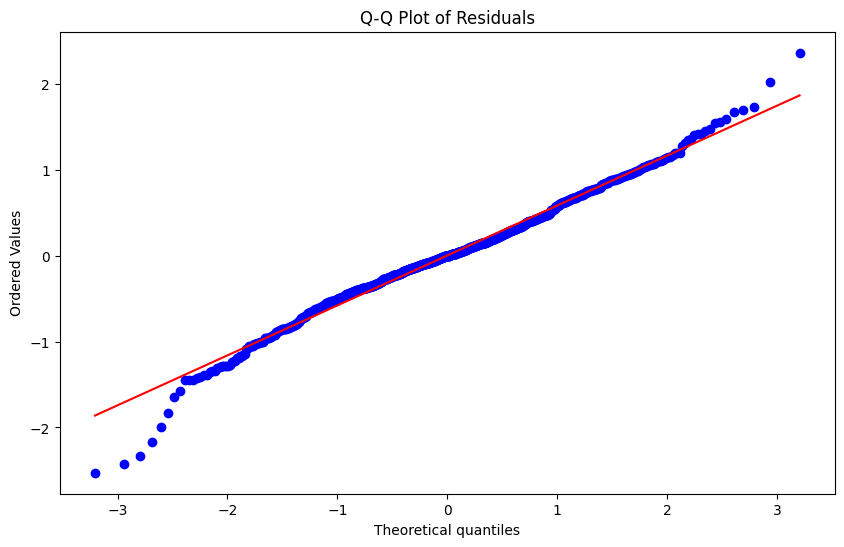

In [32]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# looking for a straight line or a s shape curve

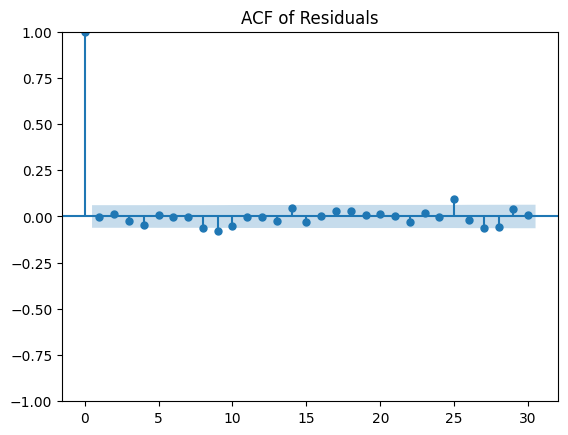

In [33]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF for residuals
plot_acf(residuals, lags=30)
plt.title('ACF of Residuals')
plt.show()

# looking for no autocorrelation (first bar high and the rest low)

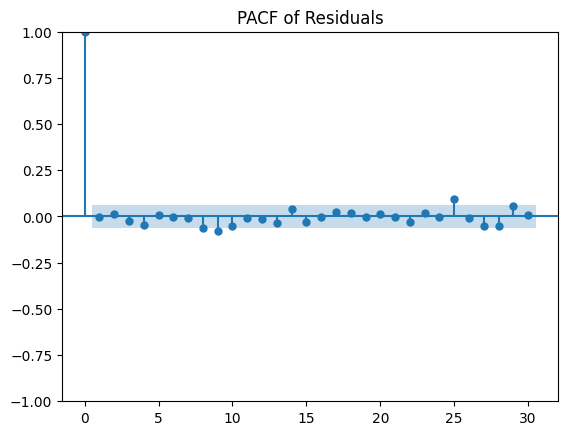

In [34]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF for residuals
plot_pacf(residuals, lags=30)
plt.title('PACF of Residuals')
plt.show()


In [35]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test for multiple lags (10, 20, 30)
lb_test_resid = acorr_ljungbox(residuals, lags=[10, 20, 30], return_df=True)
print(lb_test_resid)


# looking at p-values higher than 0.05

      lb_stat  lb_pvalue
10  16.232821   0.093159
20  22.280268   0.325498
30  42.423482   0.065807


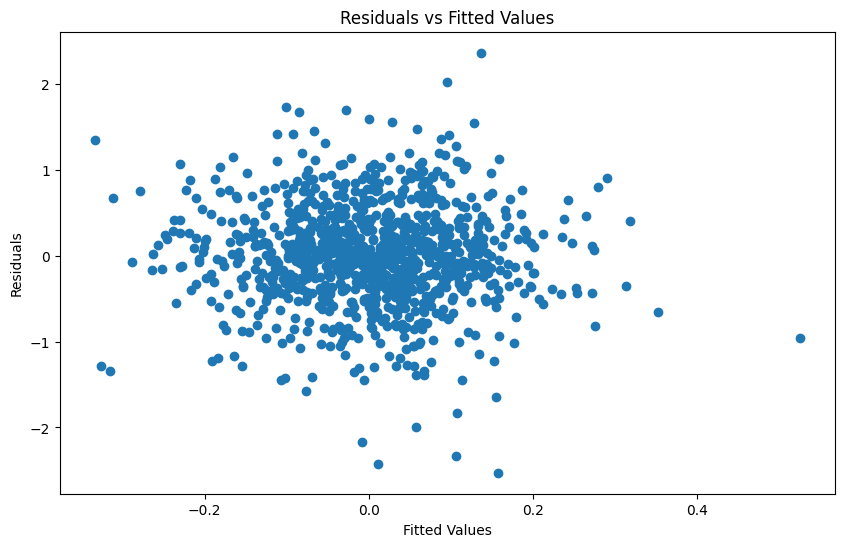

In [36]:
# Fitted values
fitted_values = fit_selected.fittedvalues

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# looking for points randomly scattered around 0, no pattern

In [37]:
X_train

array([[-0.18457865, -1.83333121,  5.37652088,  0.2972849 , -2.28961551,
         1.10255776],
       [-2.021895  ,  0.00577146,  5.37652088,  0.26151431, -1.824282  ,
         1.38039158],
       [-0.15940454, -1.22029699,  5.37652088,  0.55004405,  0.61442497,
         0.96132552],
       ...,
       [-2.021895  ,  0.00577146, -0.18599388,  0.26962694,  3.17377409,
         3.53128679],
       [-0.08390141, -0.12559302, -0.18599388,  0.13466288, -1.39341532,
         3.427099  ],
       [-0.26008177,  0.46554712, -0.18599388,  0.28750655,  0.61442497,
         3.05202383]])

In [38]:
X_train = pd.DataFrame(X_train, index=train_index)
y_train = pd.DataFrame(y_train, index=train_index)
X_test = pd.DataFrame(X_test, index=test_index)
y_test = pd.DataFrame(y_test, index=test_index)

In [39]:
len(y_train)

1025

In [40]:
len(train_index)

1025

In [41]:
train_index.dtype

dtype('<M8[ns]')

In [53]:
y_train_temp

2015-01-06    0.000000
2015-01-07    0.130001
2015-01-08    1.380001
2015-01-09   -0.430000
2015-01-12    0.029999
                ...   
2018-12-25    0.000000
2018-12-26    0.000000
2018-12-27    0.170002
2018-12-28    0.070000
2018-12-31    0.000000
Length: 1025, dtype: float64

c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


First forecast: 1025   -0.119265
dtype: float64
Second forecast: 1026    0.06209
dtype: float64


c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


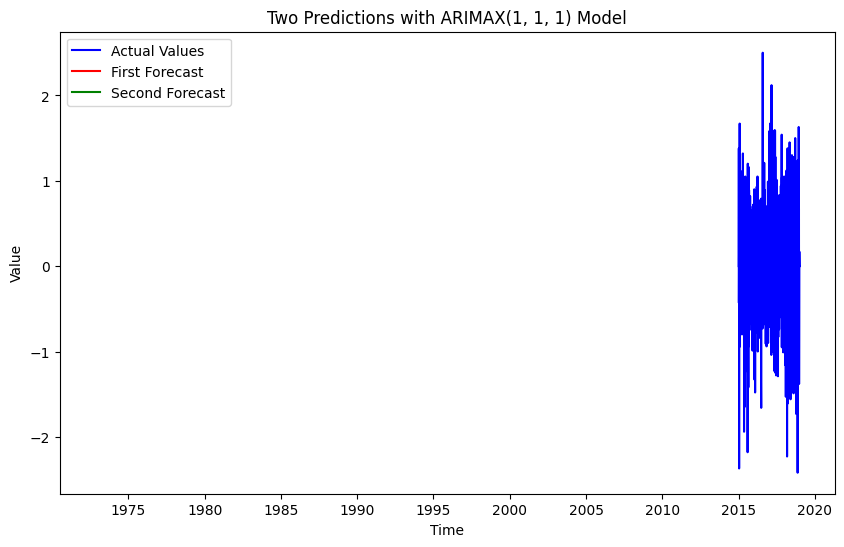

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Ensure y_train is a 1D array before creating a pandas Series
y_train_temp = pd.Series(y_train.iloc[:, 0].values, index=train_index)  # Adjust the start date and frequency as per your data

# If X_train is a numpy array, convert it to DataFrame
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train)

# Fit the ARIMAX model with the current data (ARIMAX(2,1,5)) for the first prediction
model = ARIMA(y_train_temp, exog=X_train[:len(y_train_temp)], order=(2, 1, 5))  # ARIMAX(2,1,5)
fit = model.fit(method_kwargs={"maxiter": 500})

# Make the first prediction
forecast_1 = fit.predict(start=len(y_train_temp), end=len(y_train_temp), exog=X_test.iloc[0,:].values.reshape(1, -1))

# Add the forecast to the training data for the second prediction
y_train_temp = pd.concat([y_train_temp, pd.Series(y_test.values[0], index=[y_test.index[0]])])

# Make the second prediction
forecast_2 = fit.predict(start=len(y_train_temp), end=len(y_train_temp), exog=X_test.iloc[:2,:].values.reshape(1, -1))

# # Print the two forecasts
# print("First forecast:", forecast_1)
# print("Second forecast:", forecast_2)

# # Plot the two predictions
# plt.figure(figsize=(10, 6))
# plt.plot(y_train_temp, label='Actual Values', color='blue')
# plt.plot(range(len(y_train_temp)-1, len(y_train_temp)), forecast_1, label='First Forecast', color='red')
# plt.plot(range(len(y_train_temp), len(y_train_temp)+1), forecast_2, label='Second Forecast', color='green')
# plt.title('Two Predictions with ARIMAX(1, 1, 1) Model')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.legend()
# plt.show()


In [68]:
forecast_1

1025   -0.119265
dtype: float64

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Ensure y_train is a 1D array before creating a pandas Series
y_train_temp = pd.Series(y_train.iloc[:, 0].values, index=train_index)  # Adjust the start date and frequency as per your data

# If X_train is a numpy array, convert it to DataFrame
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train)

# Fit the ARIMAX model with the current data (ARIMAX(2,1,5)) for the first prediction
model = ARIMA(y_train_temp, exog=X_train[:len(y_train_temp)], order=(2, 1, 5))  # ARIMAX(2,1,5)
fit = model.fit(method_kwargs={"maxiter": 500})

# Initialize empty lists to store the results
predictions = []
actuals = []

# Loop through the test set
for i in range(len(X_test)):
    # If it's the first prediction, we only need the first exogenous value
    if i == 0:
        forecast = fit.predict(start=len(y_train_temp), end=len(y_train_temp), exog=X_test.iloc[i, :].values.reshape(1, -1))
    else:
        # For subsequent predictions, add the forecasted value to y_train_temp
        y_train_temp = pd.concat([y_train_temp, pd.Series(forecast, index=[y_test.index[i-1]])])

        # Also, collect the exogenous variables for the current prediction
        exog_values = X_test.iloc[:i+1, :].values  # Collect exogenous variables up to current point
        
        forecast = fit.predict(start=len(y_train_temp), end=len(y_train_temp), exog=exog_values)
    
    # Store the prediction and the actual value
    predictions.append(forecast.iloc[0])  # forecast is an array, so we take the first element
    actuals.append(y_test.iloc[i, 0])  # Get the actual value from y_test

# Create a DataFrame with predictions and actual values
results_df = pd.DataFrame({
    'Predicted': predictions,
    'Actual': actuals
}, index=y_test.index)




# Print the DataFrame with predictions and actual values
print(results_df)




c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is ava

            Predicted    Actual
2019-01-01  -0.119265  0.000000
2019-01-02   0.062090  1.029999
2019-01-03  -0.053890 -0.930000
2019-01-04  -0.004922  0.880001
2019-01-07  -0.045660  0.450001
...               ...       ...
2019-12-24   0.008440  0.000000
2019-12-25   0.069834  0.000000
2019-12-26  -0.008118  0.000000
2019-12-27   0.130008 -0.129997
2019-12-30  -0.068217 -0.080002

[260 rows x 2 columns]


c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Oskar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an

In [81]:
test = pd.merge(results_df, stocks['Close_PKO'], left_index=True, right_index=True)

In [82]:
test

,Predicted,Actual,Close_PKO
2019-01-01,-0.119265,0.000000,39.470001
2019-01-02,0.062090,1.029999,40.500000
2019-01-03,-0.053890,-0.930000,39.570000
2019-01-04,-0.004922,0.880001,40.450001
2019-01-07,-0.045660,0.450001,40.900002
...,...,...,...
2019-12-24,0.008440,0.000000,34.669998
2019-12-25,0.069834,0.000000,34.669998
2019-12-26,-0.008118,0.000000,34.669998
2019-12-27,0.130008,-0.129997,34.540001


In [85]:
test['test'] = test['Actual'] + test['Close_PKO'].shift(1)
test['Predicted_values'] = test['Predicted'] + test['Close_PKO'].shift(1)

In [86]:
test

,Predicted,Actual,Close_PKO,test,Predicted_values
2019-01-01,-0.119265,0.000000,39.470001,NaN,NaN
2019-01-02,0.062090,1.029999,40.500000,40.500000,39.532091
2019-01-03,-0.053890,-0.930000,39.570000,39.570000,40.446110
2019-01-04,-0.004922,0.880001,40.450001,40.450001,39.565078
2019-01-07,-0.045660,0.450001,40.900002,40.900002,40.404341
...,...,...,...,...,...
2019-12-24,0.008440,0.000000,34.669998,34.669998,34.678438
2019-12-25,0.069834,0.000000,34.669998,34.669998,34.739833
2019-12-26,-0.008118,0.000000,34.669998,34.669998,34.661880
2019-12-27,0.130008,-0.129997,34.540001,34.540001,34.800006


In [75]:
# Check the last actual value in y_train_temp
last_actual_value = y_train_temp.iloc[-1]  # This should be a valid number, not NaN

# Revert differenced predictions
predicted_values = []
for diff_pred in predictions:
    # Ensure diff_pred is a valid number (not NaN)
    if pd.notna(diff_pred):
        predicted_value = last_actual_value + diff_pred  # Revert the differenced value
        predicted_values.append(predicted_value)
        last_actual_value = predicted_value  # Update the last actual value for the next prediction
    else:
        # Handle NaN in predictions (if any)
        predicted_values.append(np.nan)

# Add the reverted predicted values to the results dataframe
results_df['Predicted_Original'] = predicted_values

# Check the results dataframe
print(results_df)

          Date  Predicted    Actual  Predicted_Original
0   2019-01-01  -0.119265  0.000000                 NaN
1   2019-01-02   0.062090  1.029999                 NaN
2   2019-01-03  -0.053890 -0.930000                 NaN
3   2019-01-04  -0.004922  0.880001                 NaN
4   2019-01-07  -0.045660  0.450001                 NaN
..         ...        ...       ...                 ...
255 2019-12-24   0.008440  0.000000                 NaN
256 2019-12-25   0.069834  0.000000                 NaN
257 2019-12-26  -0.008118  0.000000                 NaN
258 2019-12-27   0.130008 -0.129997                 NaN
259 2019-12-30  -0.068217 -0.080002                 NaN

[260 rows x 4 columns]
